# Building (A Simple) Song Recommender System
By Briant Illescas <br>
Using a subset of this data set: http://millionsongdataset.com/ <br>
Goal: To give recommendations based on a title of a song

# An Exploration of the Data

In [1]:
import numpy as np
import pandas as pd

triplets = 'https://static.turi.com/datasets/millionsong/10000.txt'
song_data = 'https://static.turi.com/datasets/millionsong/song_data.csv'

In [2]:
songs_columns = ['user_id', 'song_id', 'listen_count']
songs_df = pd.read_table(triplets)
songs_df.columns = songs_columns

In [3]:
data_df = pd.read_csv(song_data)

In [4]:
songs_df.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5


In [5]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999999 entries, 0 to 1999998
Data columns (total 3 columns):
user_id         object
song_id         object
listen_count    int64
dtypes: int64(1), object(2)
memory usage: 45.8+ MB


In [6]:
data_df.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [7]:
songs_df = pd.merge(songs_df, data_df, on='song_id')

In [8]:
songs_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
1,930d2be6c85315d72cab9823ec0f7bfe7e477794,SOBBMDR12A8C13253B,1,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,41c12ce05f18b757d9257e5ad4f8303b4b8a8758,SOBBMDR12A8C13253B,66,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
3,f8611810514c93d57bb846aa0b5e0410d9730a14,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
4,5968a59e582f434a223b3786cd51c9f4690b38d4,SOBBMDR12A8C13253B,6,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976


In [9]:
songs_df['song'] = songs_df['title'] + '-' + songs_df['artist_name']

## Top 10 Songs by Unique Listens

In [10]:
songs_df.groupby('song')['listen_count'].count().sort_values(ascending=False).head(10)

song
Sehr kosmisch-Harmonia                                                                                                                        8277
Use Somebody-Kings Of Leon                                                                                                                    7952
Undo-Björk                                                                                                                                    7032
Dog Days Are Over (Radio Edit)-Florence + The Machine                                                                                         6949
You're The One-Dwight Yoakam                                                                                                                  6412
Revelry-Kings Of Leon                                                                                                                         6145
Secrets-OneRepublic                                                                                              

## Top 10 Songs by Total Listens

In [11]:
songs_df.groupby('song')['listen_count'].sum().sort_values(ascending=False).head(10)

song
You're The One-Dwight Yoakam                                                                                                                  54136
Undo-Björk                                                                                                                                    49253
Revelry-Kings Of Leon                                                                                                                         41418
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)-Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner    31153
Sehr kosmisch-Harmonia                                                                                                                        31036
Dog Days Are Over (Radio Edit)-Florence + The Machine                                                                                         26663
Use Somebody-Kings Of Leon                                                                                 

## Top 10 Artists by Unique Listens

In [12]:
songs_df.groupby('artist_name')['listen_count'].count().sort_values(ascending=False).head(10)

artist_name
Coldplay                  32572
Kings Of Leon             26169
The Black Keys            19862
Jack Johnson              19589
Muse                      19282
Florence + The Machine    18112
The Killers               17039
Justin Bieber             16732
Radiohead                 15953
Eminem                    15884
Name: listen_count, dtype: int64

## Top 10 Artists by Total Listens

In [13]:
songs_df.groupby('artist_name')['listen_count'].sum().sort_values(ascending=False).head(10)

artist_name
Kings Of Leon             86031
Coldplay                  78540
Florence + The Machine    60066
Dwight Yoakam             54136
Björk                     53814
The Black Keys            52220
Muse                      52136
Justin Bieber             50376
Jack Johnson              48486
Eminem                    41754
Name: listen_count, dtype: int64

## Number of Unique Users and Songs

In [14]:
users = songs_df['user_id'].unique()
len(users)

76353

In [15]:
songs = songs_df['song'].unique()
len(songs)

9982

## Lets Continue Cleaning the Data
### NOTE: For this recommender system, we will be using only the first 600,000 songs
### My poor computer could not handle 2 million entries

In [16]:
sm_songs_df = songs_df[0:599999]

song_grouped = sm_songs_df.groupby(['song']).agg({'listen_count': 'sum'}).reset_index()
total_count= song_grouped['listen_count'].sum()
song_grouped['avg listens']  = song_grouped['listen_count'].div(total_count)*100
song_grouped.sort_values(['listen_count', 'song'], ascending=False).head(10)

,song,listen_count,avg listens
1117,You're The One-Dwight Yoakam,54136,2.983578
1024,Undo-Björk,49253,2.714463
733,Revelry-Kings Of Leon,41418,2.282655
392,Horn Concerto No. 4 in E flat K495: II. Romanc...,31153,1.716924
773,Sehr kosmisch-Harmonia,31036,1.710476
220,Dog Days Are Over (Radio Edit)-Florence + The ...,26663,1.469468
1036,Use Somebody-Kings Of Leon,22140,1.220194
772,Secrets-OneRepublic,22100,1.217989
25,Ain't Misbehavin-Sam Cooke,18309,1.009057
156,Catch You Baby (Steve Pitron & Max Sanna Radio...,18041,0.994287


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\brian\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


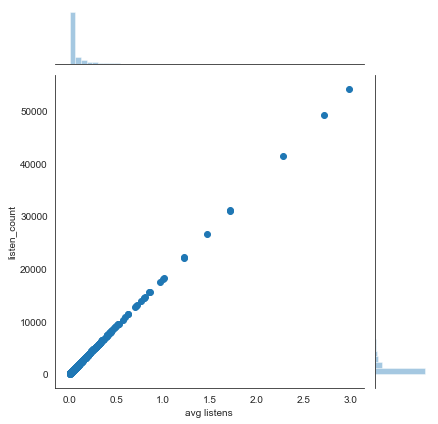

In [18]:
# A joint plot of listen_count vs avg listens, very obvious but just exploring

sns.set_style('white')
sns.jointplot(x='avg listens',y='listen_count',data=song_grouped)

(0, 3000)

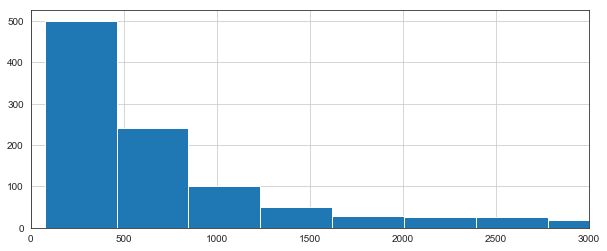

In [19]:
# Using this to filter out songs by X listens to create better recommendations 
plt.figure(figsize=(10,4))
song_grouped['listen_count'].hist(bins=140)
plt.xlim(0,3000)

In [20]:
#Looking at the above graph, 1200 might be a good threshold

In [21]:
songmat = sm_songs_df.pivot_table(index='user_id',columns='song',values='listen_count')
songmat.head()

song,& Down-Boys Noize,'97 Bonnie & Clyde-Eminem,'Round Midnight-Miles Davis,'Till I Collapse-Eminem / Nate Dogg,(Nice Dream)-Radiohead,(You Drive Me) Crazy (The Stop Remix!)-Britney Spears,16 Candles-The Crests,1983 (Daedelus's Odd-Dance Party Remix)-Flying Lotus,1983-Flying Lotus,3AM (LP Version)-matchbox twenty,...,Your Visits Are Getting Shorter-Bloc Party,ZDRLT (Rewind)-Digitalism,a joy-Four Tet,and then patterns-Four Tet,high fives-Four Tet,ný Batterý-Sigur Ros,re:stacks-Bon Iver,sleep_ eat food_ have visions-Four Tet,sun drums and soil-Four Tet,you were there with me-Four Tet
user_id,,,,,,,,,,,,,,,,,,,,,
00030033e3a2f904a48ec1dd53019c9969b6ef1f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0007c0e74728ca9ef0fe4eb7f75732e8026a278b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000b474f815bcff17a4bc9ce5324f9352dafe07d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000b4e4134d5f77d7608fbf86fb3e1adac4478a8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000d2df2cb8ad7300f89512f8fe8fadc4f99e733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Lets give recs some song recs! 	

In [22]:
song_title = 'When You Were Young-The Killers' #used this to type in any song, i love The Killers so...lets go with that
bjork = songmat[song_title]

In [23]:
similar = songmat.corrwith(bjork)
similar.dropna(inplace=True)
recs = pd.DataFrame(similar, columns=['Correlation'])

C:\Users\brian\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\brian\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [24]:
recs = recs.merge(song_grouped.drop('avg listens', axis=1), on='song')

In [25]:
# The threshold of 1200 was picked looking at the distrubution of listen_count
recs[recs['listen_count'] >1200].sort_values('Correlation',ascending=False).head(10)

,song,Correlation,listen_count
955,When You Were Young-The Killers,1.000000,5839
420,Is This It-The Strokes,0.912575,2548
857,The Unforgiven III-Metallica,0.905921,1802
852,The Saltwater Room-Owl City,0.853997,1417
655,Replay-Iyaz,0.827520,1746
56,Apologize-OneRepublic,0.826360,2505
96,Blow Me Away-Breaking Benjamin,0.808063,1416
262,Flume-Bon Iver,0.787736,1758
982,You Know I'm No Good-Amy Winehouse,0.761290,2846
989,You'd Be So Nice To Come Home To-Julie London,0.737799,1790
